In [1]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
coins = ['ada', 'bch', 'btc', 'doge', 'dot', 'eos', 'etc', 'eth', 'link', 'ltc', 'sol', 'uni', 'xlm', 'xrp']

In [4]:
T1 = []
total1 = 0
D1 = {}
for i in coins:
    ds = pd.read_csv(f'Xs/round2/{i}.csv')
    ds = ds.drop_duplicates().dropna()
    D1[i] = [ds.shape[0]]
    T1.append(ds)
    total1+=ds.shape[0]
coin = 'all'

In [5]:
T2 = []
total2 = 0
for i in coins:
    ds = pd.read_csv(f'Xs/round1/{i}.csv')
    ds = ds.drop_duplicates().dropna()
    if i not in D1:
        D1[i] = [ds.shape[0]]
    else:
        D1[i].append(ds.shape[0])
    T2.append(ds)
    total2+=ds.shape[0]
coin = 'all'

In [6]:
ds = pd.concat(T1+T2, axis=0).drop_duplicates()# [Cs]
print(ds.shape)
ds.head(3)

(8592, 54)


,target,n,diff1,diff2,media_rb_10,media_ra_10,media_rb_25,media_ra_25,media_rb_50,media_ra_50,...,outro_rb_10,outro_ra_10,outro_rb_25,outro_ra_25,outro_rb_50,outro_ra_50,outro_rb_100,outro_ra_100,outro_rb_250,outro_ra_250
0,1.0,5.0,0.685687,1.001049,0.470480,0.529520,0.519650,0.480350,0.493376,0.506624,...,0.449218,0.550782,0.509957,0.490043,0.524450,0.475550,0.489591,0.510409,0.472838,0.527162
1,0.0,4.0,0.128506,0.451285,0.486180,0.513820,0.477848,0.522152,0.521652,0.478348,...,0.425607,0.574393,0.484575,0.515425,0.523329,0.476671,0.513296,0.486704,0.481504,0.518496
2,1.0,6.0,0.209147,0.515755,0.443569,0.556431,0.471258,0.528742,0.504821,0.495179,...,0.511948,0.488052,0.501723,0.498277,0.505666,0.494334,0.487643,0.512357,0.469902,0.530098


In [8]:
X = ds.drop(columns=['target']).values
Y = ds.target.values
Y

array([1., 0., 1., ..., 0., 1., 0.])

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size = 0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6444, 53), (2148, 53), (6444,), (2148,))

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [96]:
from keras.models import load_model
loaded_model = load_model('model.h5')

In [12]:
y_pred = loaded_model.predict(x_test)
y_pred

array([[0.98543155],
       [0.9958172 ],
       [0.9999998 ],
       ...,
       [0.99777865],
       [0.99999505],
       [0.99984884]], dtype=float32)

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

In [100]:
x_train[:, 0]==4

array([False, False,  True, ..., False, False, False])

In [102]:
x_test[:, 0]==4

array([False, False, False, ...,  True, False, False])

In [104]:
# x_train_n = scaler.transform(x_train)
x_test_n = scaler.transform(x_test[x_test[:, 0]==4])

In [112]:
# cond = x_test[:, 0]==4
cond = x_train[:, 0]==4
x_train_n = scaler.transform(x_train[cond])
# x_test_n = scaler.transform(x_test[cond])
# score = loaded_model.evaluate(x_test_n, y_test[cond],verbose=1)
score = loaded_model.evaluate(x_train_n, y_train[cond],verbose=1)
print(score)

50/50 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9733
[0.07274928689002991, 0.9733333587646484]


In [113]:
# cond = x_test[:, 0]==4
cond = x_train[:, 0]==5
x_train_n = scaler.transform(x_train[cond])
# x_test_n = scaler.transform(x_test[cond])
# score = loaded_model.evaluate(x_test_n, y_test[cond],verbose=1)
score = loaded_model.evaluate(x_train_n, y_train[cond],verbose=1)
print(score)

41/41 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.9761
[0.06472650915384293, 0.9761170744895935]


In [114]:
# cond = x_test[:, 0]==4
cond = x_train[:, 0]==6
x_train_n = scaler.transform(x_train[cond])
# x_test_n = scaler.transform(x_test[cond])
# score = loaded_model.evaluate(x_test_n, y_test[cond],verbose=1)
score = loaded_model.evaluate(x_train_n, y_train[cond],verbose=1)
print(score)

33/33 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9643
[0.09603066742420197, 0.964320182800293]


In [115]:
# cond = x_test[:, 0]==4
cond = x_train[:, 0]==7
x_train_n = scaler.transform(x_train[cond])
# x_test_n = scaler.transform(x_test[cond])
# score = loaded_model.evaluate(x_test_n, y_test[cond],verbose=1)
score = loaded_model.evaluate(x_train_n, y_train[cond],verbose=1)
print(score)

24/24 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9683
[0.09747712314128876, 0.9682959318161011]


In [34]:
ns = x_test[:, 0]#.reshape(-1, 1)
ns

array([ 6.,  5.,  6., ...,  4.,  5., 11.])

In [35]:
ns.shape

(2148,)

In [36]:
arr_1 = y_pred[y_pred>=.5]
n_1 = ns[(y_pred>=.5).T[0]]
arr_1

array([0.98543155, 0.9958172 , 0.9999998 , ..., 0.99777865, 0.99999505,
       0.99984884], dtype=float32)

In [40]:
D1 = {}
for i in range(len(n_1)):
    nn = n_1[i]
    pre1 = arr_1[i]
    if nn not in D1:
        D1[nn] = [pre1]
    else:
        D1[nn] += [pre1]

In [53]:
aaa = list(D1.keys())
aaa.sort()
print(aaa)

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 24.0, 29.0]


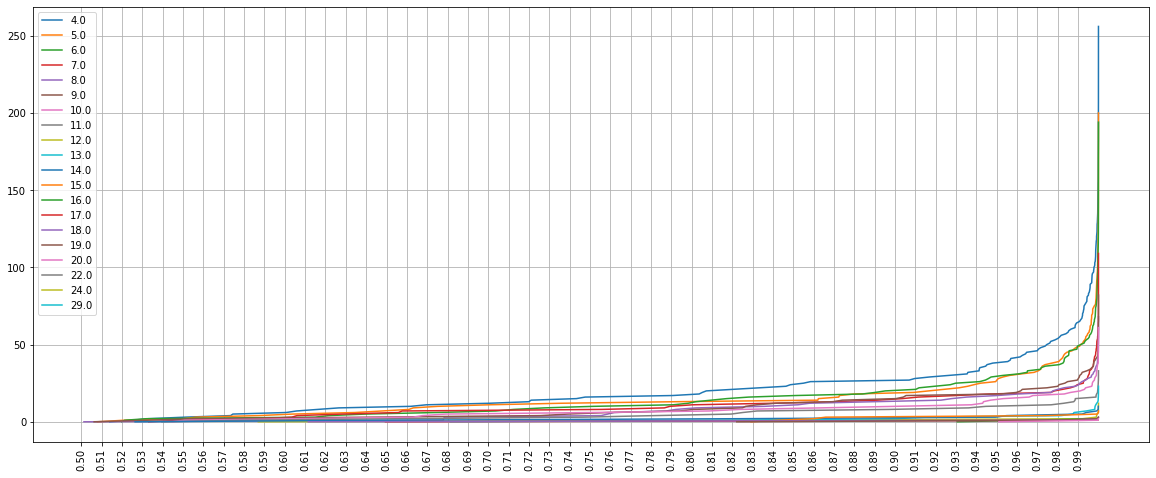

In [84]:
plt.figure(figsize=(20, 8))
rt = []
for i in aaa:
    l = D1[i]
    l.sort()
    # l = l[::-1]
    # m = np.mean(l)
    plt.plot(l, range(len(l)))
    # print(round(i), l)
    rt.append(i)
plt.legend(rt)
plt.xticks([i/100 for i in range(50, 100)], rotation=90)
plt.grid()

In [41]:
arr_0 = y_pred[y_pred<.5]
n_0 = ns[(y_pred<.5).T[0]]
arr_0

array([0.00033671, 0.01260397, 0.02866307, ..., 0.00206432, 0.00082609,
       0.31085324], dtype=float32)

In [42]:
D0 = {}
for i in range(len(n_0)):
    nn = n_0[i]
    pre0 = arr_0[i]
    if nn not in D0:
        D0[nn] = [pre0]
    else:
        D0[nn] += [pre0]

In [85]:
bbb = list(D0.keys())
bbb.sort()
print(bbb)

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 20.0, 21.0, 22.0, 27.0, 36.0]


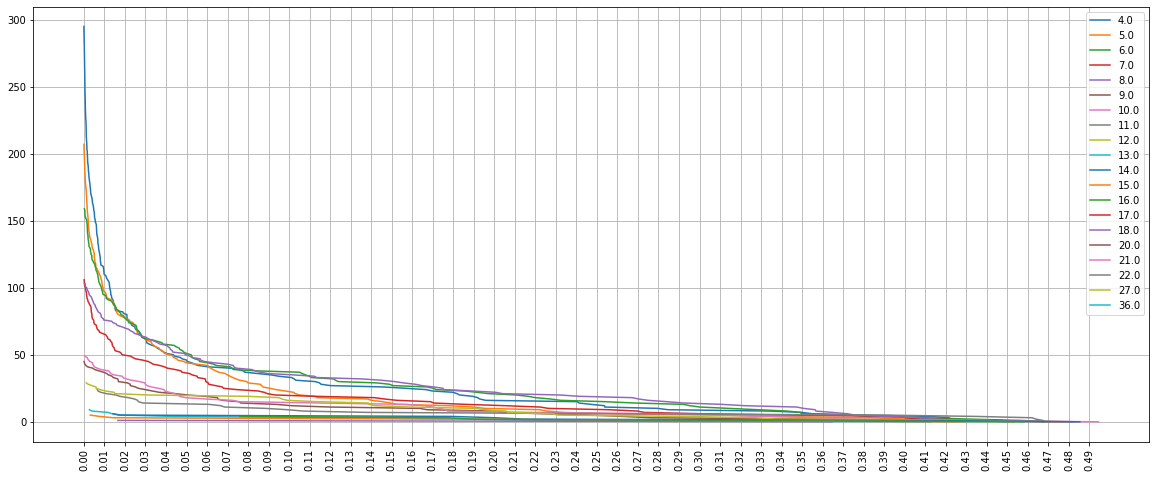

In [94]:
plt.figure(figsize=(20, 8))
rt = []
for i in bbb:
    l = D0[i]
    l.sort()
    l = l[::-1]
    # m = np.mean(l)
    plt.plot(l, range(len(l)))
    # print(round(i), l)
    rt.append(i)
plt.legend(rt)
plt.xticks([i/100 for i in list(range(0, 50))], rotation=90)
plt.grid()